In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('states18.csv')
df.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN


In [1]:
df.tail() #comment

NameError: name 'df' is not defined

In [6]:
statelist=df['State'].unique()
statelist


array(['Kerala', 'India', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir',
       'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh',
       'Himachal Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry',
       'West Bengal', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Goa', 'Mizoram',
       'Andaman and Nicobar Islands', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Nagaland', 'Tripura',
       'Dadra and Nagar Haveli and Daman and Diu', 'Meghalaya', 'Sikkim',
       'State Unassigned', 'Lakshadweep'], dtype=object)

### The above data set is in a cumulative form we have convert it to the usual form

In [8]:
newdf=pd.DataFrame()

In [9]:
test=df.groupby('State').get_group('India')

In [10]:
test.tail()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
18008,2021-07-24,India,31371493,30535496,420585,12418,456289567.0
18045,2021-07-25,India,31409672,30571441,420996,12428,457444011.0
18082,2021-07-26,India,31440492,30613944,421414,12440,459164121.0
18119,2021-07-27,India,31483463,30655597,422055,12468,460900978.0
18156,2021-07-28,India,31526628,30694134,422695,12475,462629773.0


In [11]:
test=test.set_index(['Date'])
test.head(2)

,State,Confirmed,Recovered,Deceased,Other,Tested
Date,,,,,,
2020-01-30,India,1,0,0,0,NaN
2020-02-02,India,2,0,0,0,NaN


In [12]:
test.drop('State',axis=1,inplace=True)
test.tail()

,Confirmed,Recovered,Deceased,Other,Tested
Date,,,,,
2021-07-24,31371493,30535496,420585,12418,456289567.0
2021-07-25,31409672,30571441,420996,12428,457444011.0
2021-07-26,31440492,30613944,421414,12440,459164121.0
2021-07-27,31483463,30655597,422055,12468,460900978.0
2021-07-28,31526628,30694134,422695,12475,462629773.0


In [13]:
test=test.diff(axis=0,periods=1)
test.tail()

,Confirmed,Recovered,Deceased,Other,Tested
Date,,,,,
2021-07-24,40286.0,40038.0,541.0,6.0,1718756.0
2021-07-25,38179.0,35945.0,411.0,10.0,1154444.0
2021-07-26,30820.0,42503.0,418.0,12.0,1720110.0
2021-07-27,42971.0,41653.0,641.0,28.0,1736857.0
2021-07-28,43165.0,38537.0,640.0,7.0,1728795.0


In [14]:
test['State']='India'
test.tail()

,Confirmed,Recovered,Deceased,Other,Tested,State
Date,,,,,,
2021-07-24,40286.0,40038.0,541.0,6.0,1718756.0,India
2021-07-25,38179.0,35945.0,411.0,10.0,1154444.0,India
2021-07-26,30820.0,42503.0,418.0,12.0,1720110.0,India
2021-07-27,42971.0,41653.0,641.0,28.0,1736857.0,India
2021-07-28,43165.0,38537.0,640.0,7.0,1728795.0,India


In [15]:
test.reset_index()

,Date,Confirmed,Recovered,Deceased,Other,Tested,State
0,2020-01-30,NaN,NaN,NaN,NaN,NaN,India
1,2020-02-02,1.0,0.0,0.0,0.0,NaN,India
2,2020-02-03,1.0,0.0,0.0,0.0,NaN,India
3,2020-02-14,0.0,3.0,0.0,0.0,NaN,India
4,2020-03-02,2.0,0.0,0.0,0.0,NaN,India
...,...,...,...,...,...,...,...
513,2021-07-24,40286.0,40038.0,541.0,6.0,1718756.0,India
514,2021-07-25,38179.0,35945.0,411.0,10.0,1154444.0,India
515,2021-07-26,30820.0,42503.0,418.0,12.0,1720110.0,India
516,2021-07-27,42971.0,41653.0,641.0,28.0,1736857.0,India


In [16]:
newdf.append(test, ignore_index = True)

,Confirmed,Recovered,Deceased,Other,Tested,State
0,NaN,NaN,NaN,NaN,NaN,India
1,1.0,0.0,0.0,0.0,NaN,India
2,1.0,0.0,0.0,0.0,NaN,India
3,0.0,3.0,0.0,0.0,NaN,India
4,2.0,0.0,0.0,0.0,NaN,India
...,...,...,...,...,...,...
513,40286.0,40038.0,541.0,6.0,1718756.0,India
514,38179.0,35945.0,411.0,10.0,1154444.0,India
515,30820.0,42503.0,418.0,12.0,1720110.0,India
516,42971.0,41653.0,641.0,28.0,1736857.0,India


In [17]:
c=df.columns

In [18]:
ndf = pd.DataFrame(columns=c)

In [19]:
ndf=pd.DataFrame()

In [20]:
for state in statelist:
    dftest=df.groupby('State').get_group(state)
    
    dftest=dftest.set_index(['Date'])
    
    dftest.drop('State',axis=1,inplace=True)
    
    dftest=dftest.diff(axis=0,periods=1)
    
    dftest['State']=state
    
    
    
    dftest.reset_index(inplace=True)
    
   # display(dftest.tail())
    
    #ndf.append(dftest,ignore_index = True)
    ndf=pd.concat([ndf,dftest])
    
    

In [21]:
ndf.tail()

,Date,Confirmed,Recovered,Deceased,Other,Tested,State
187,2021-07-24,17.0,6.0,0.0,0.0,1011.0,Lakshadweep
188,2021-07-25,2.0,7.0,0.0,0.0,258.0,Lakshadweep
189,2021-07-26,12.0,6.0,0.0,0.0,1306.0,Lakshadweep
190,2021-07-27,8.0,8.0,0.0,0.0,1327.0,Lakshadweep
191,2021-07-28,6.0,11.0,1.0,0.0,1238.0,Lakshadweep


In [22]:
df.shape

(18160, 7)

In [23]:
ndf.shape

(18160, 7)

In [24]:
ndf.sort_values(by=['Date'],ignore_index=True,inplace=True)

In [25]:
display(ndf.head(2))
ndf.tail(2)


,Date,Confirmed,Recovered,Deceased,Other,Tested,State
0,2020-01-30,NaN,NaN,NaN,NaN,NaN,Kerala
1,2020-01-30,NaN,NaN,NaN,NaN,NaN,India


,Date,Confirmed,Recovered,Deceased,Other,Tested,State
18158,2021-07-28,815.0,811.0,14.0,0.0,45122.0,West Bengal
18159,2021-07-28,6.0,11.0,1.0,0.0,1238.0,Lakshadweep


In [26]:
ndf.isnull().sum()

Date           0
Confirmed     38
Recovered     38
Deceased      38
Other         38
Tested       791
State          0
dtype: int64

In [27]:
ndf.dtypes

Date          object
Confirmed    float64
Recovered    float64
Deceased     float64
Other        float64
Tested       float64
State         object
dtype: object

#### Aproximately splitting the data set into First wave and second wave by assuming that  the seceond wave started in march 2021 in india


In [28]:
ndf

,Date,Confirmed,Recovered,Deceased,Other,Tested,State
0,2020-01-30,NaN,NaN,NaN,NaN,NaN,Kerala
1,2020-01-30,NaN,NaN,NaN,NaN,NaN,India
2,2020-02-02,1.0,0.0,0.0,0.0,NaN,Kerala
3,2020-02-02,1.0,0.0,0.0,0.0,NaN,India
4,2020-02-03,1.0,0.0,0.0,0.0,NaN,Kerala
...,...,...,...,...,...,...,...
18155,2021-07-28,60.0,46.0,0.0,1.0,27810.0,Uttarakhand
18156,2021-07-28,1703.0,1699.0,69.0,0.0,78740.0,Odisha
18157,2021-07-28,97.0,96.0,1.0,0.0,5635.0,Puducherry
18158,2021-07-28,815.0,811.0,14.0,0.0,45122.0,West Bengal


In [29]:
ndf.loc[ndf['Date']=='2021-03-01']

,Date,Confirmed,Recovered,Deceased,Other,Tested,State
12610,2021-03-01,0.0,0.0,0.0,0.0,0.0,Dadra and Nagar Haveli and Daman and Diu
12611,2021-03-01,132.0,15.0,1.0,0.0,5033.0,Himachal Pradesh
12612,2021-03-01,1.0,0.0,0.0,0.0,378.0,Arunachal Pradesh
12613,2021-03-01,116.0,165.0,0.0,0.0,20375.0,Telangana
12614,2021-03-01,166.0,151.0,2.0,0.0,8615.0,Haryana
12615,2021-03-01,1.0,1.0,0.0,0.0,805.0,Meghalaya
12616,2021-03-01,9.0,16.0,1.0,0.0,693.0,Puducherry
12617,2021-03-01,1938.0,3475.0,13.0,2.0,45995.0,Kerala
12618,2021-03-01,633.0,394.0,18.0,0.0,13727.0,Punjab
12619,2021-03-01,86.0,76.0,0.0,0.0,20276.0,Odisha


In [30]:
swave=ndf.loc[12610:,["Date",'State','Confirmed','Recovered','Deceased','Other','Tested']]

In [31]:
swave.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
12610,2021-03-01,Dadra and Nagar Haveli and Daman and Diu,0.0,0.0,0.0,0.0,0.0
12611,2021-03-01,Himachal Pradesh,132.0,15.0,1.0,0.0,5033.0
12612,2021-03-01,Arunachal Pradesh,1.0,0.0,0.0,0.0,378.0
12613,2021-03-01,Telangana,116.0,165.0,0.0,0.0,20375.0
12614,2021-03-01,Haryana,166.0,151.0,2.0,0.0,8615.0


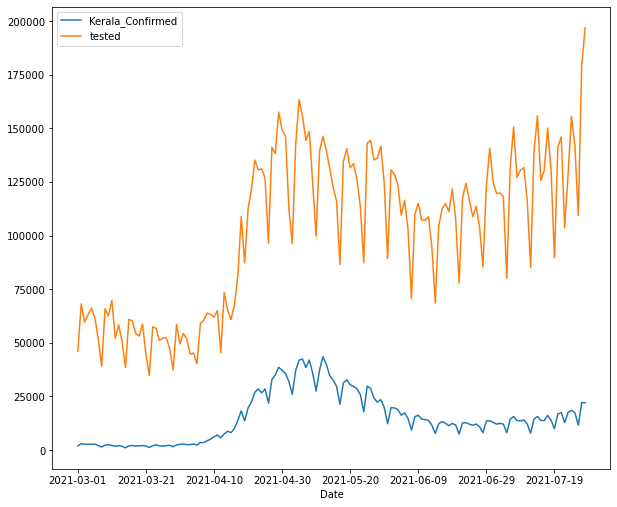

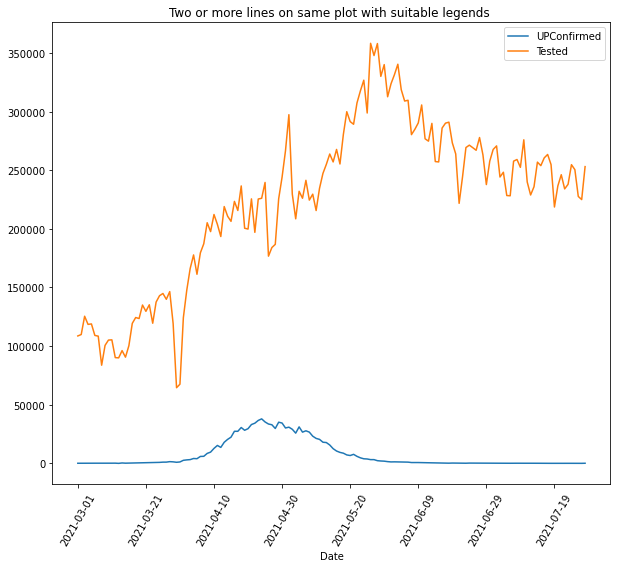

In [32]:
swave.groupby('State').get_group("Kerala").plot(x='Date',y=['Confirmed','Tested'],figsize=(10,8.5),label=['Kerala_Confirmed',"tested"])
plt.legend()
swave.groupby('State').get_group("Uttar Pradesh").plot(x='Date',y=['Confirmed','Tested'],figsize=(10,8.5),label=['UPConfirmed','Tested'])
plt.xticks(rotation=60)
plt.legend()
plt.title('Two or more lines on same plot with suitable legends ')
plt.show()

In [35]:
kerala=swave.groupby('State').get_group("Kerala")
ktest=kerala['Tested']
#ktest
kconf=kerala['Confirmed']
up=swave.groupby('State').get_group("Uttar Pradesh")
utest=up["Tested"]
uconf=up['Confirmed']
date=up['Date']


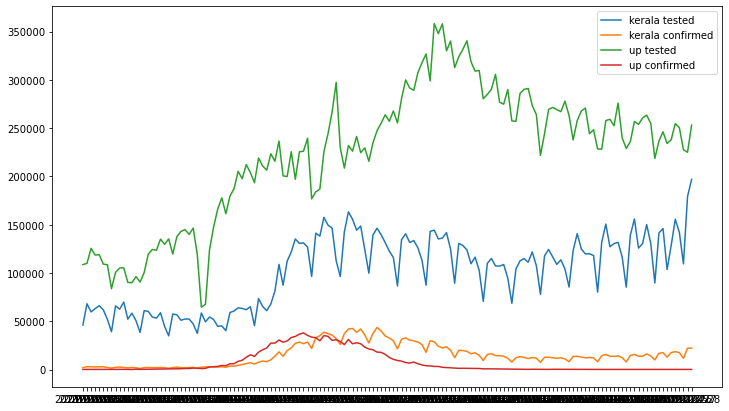

In [34]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(date, ktest, label = "kerala tested")
plt.plot(date, kconf, label = "kerala confirmed")
plt.plot(date,utest,label='up tested')
plt.plot(date,uconf,label='up confirmed')
plt.legend()



In [ ]:
swave.head()

In [36]:
li=['Kerala','Uttar Pradesh']
klup=swave[swave.State.isin(li)]

<function matplotlib.pyplot.show(close=None, block=None)>

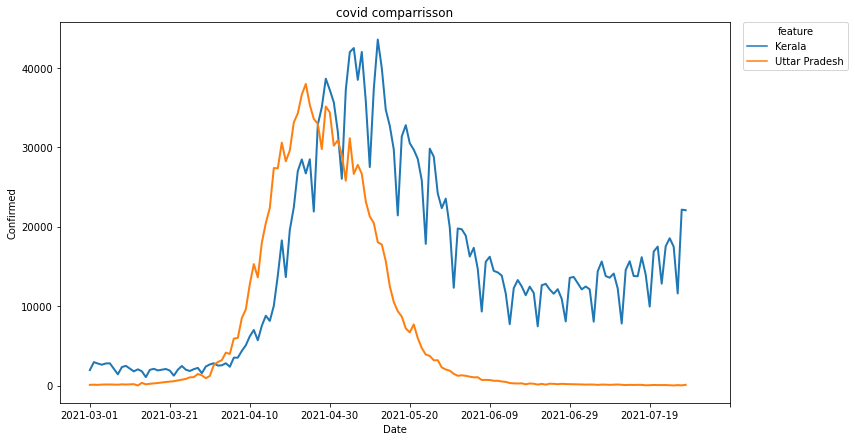

In [37]:
x = np.random.randint(low=0, high=5, size=150)

fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=klup, x="Date", y='Confirmed', hue="State",linewidth = 2)
plt.legend( bbox_to_anchor=(1.02, 1),loc='upper left', borderaxespad=0, title='feature')
plt.title('covid comparrisson')
plt.xticks(np.arange(0, len(x)+15, 20))
#ax.set_xticks(np.arange(0, len(x)+1, 5))
plt.show

In [54]:
def twoStates(slist,feature):
    df=swave[swave.State.isin(slist)]
    x = np.random.randint(low=0, high=5, size=150)

    fig, ax = plt.subplots(figsize=(12, 7))
    sns.lineplot(data=df, x="Date", y=feature, hue="State",linewidth = 2)
    plt.legend( bbox_to_anchor=(1.02, 1),loc='upper left', borderaxespad=0, title='states')
    #plt.title('Comparison of '+ feature +' on '+ slist[0] +' and '+ slist[1])
    fig.suptitle('Comparison of '+ feature +' on '+ slist[0] +' and '+ slist[1], fontsize=18)
    plt.xticks(np.arange(0, len(x)+15, 20))
    #ax.set_xticks(np.arange(0, len(x)+1, 5))
    plt.show
    
    

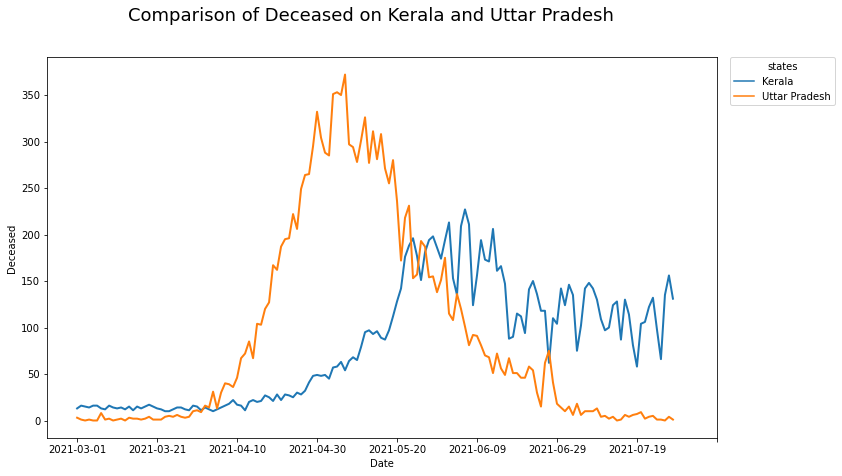

In [55]:
twoStates(['Kerala','Uttar Pradesh'],'Deceased')

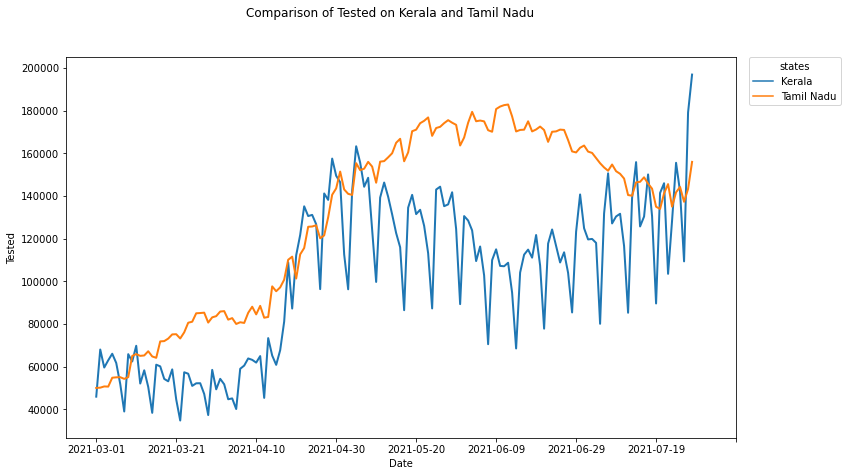

In [53]:
twoStates(['Kerala','Tamil Nadu'],'Tested')

In [ ]:
statelist

In [ ]:
vac=pd.read_csv("vaccine_doses_statewise_v2.csv")
vac.head()

In [ ]:
len(vac['State'].unique())

In [ ]:
vac['Vaccinated As of']=pd.to_datetime(vac['Vaccinated As of'])

In [ ]:
vac.loc[:0,"Vaccinated As of"]

In [ ]:
swave['Date']=pd.to_datetime(df['Date'])

In [ ]:
vac.rename(columns={'Vaccinated As of':'Date'},inplace=True)
vac.head(3)

In [ ]:
#df3=vac.set_index(['Date'])
#df4=df.set_index(['Date'])
#df4.head()

In [ ]:
sl=vac['State'].unique()

In [ ]:
vac['First Dose Administered']=vac['First Dose Administered'].astype(float)
vac['Second Dose Administered']=vac['Second Dose Administered'].astype(float)
vac['Total Doses Administered']=vac['Total Doses Administered'].astype(float)
vac.dtypes

In [ ]:
cc=['Date','First Dose Administered','Second Dose Administered','Total Doses Administered','State']
vac2 = pd.DataFrame(columns=cc)
type(vac2)

In [ ]:
#vac2=pd.DataFrame()
for state in sl:
    dftest=vac.groupby('State').get_group(state)
    
    dftest=dftest.set_index(['Date'])
    
    dftest.drop('State',axis=1,inplace=True)
    
    dftest=dftest.cumsum(axis = 0, skipna = True)
    
    dftest['State']=state
    
    
    
    dftest.reset_index(inplace=True)
   
    vac2=vac2.append(dftest)

   
   

In [ ]:
vac.loc[vac['State']=='Goa']['Total Doses Administered']#Took a look at orginal data

In [ ]:
vac2.loc[vac2['State']=='Goa']['Total Doses Administered']#Took a look at modified data

In [ ]:
vac2.loc[vac2['State']=='Goa']['Total Doses Administered'].plot()#Tried to plot it some sort of problem

In [ ]:
final=pd.merge(swave,vac2, how ='inner', on =['State','Date'])

In [ ]:
final.head()#Why does Bihar comes 3 times

In [ ]:
final.columns

In [ ]:
final.tail()

In [ ]:
fet=final.columns

In [ ]:
def twoStates2(sl,fet):
    dfs=final[final.State.isin(sl)]
    #x = np.random.randint(low=0, high=100, size=100)

    fig, ax = plt.subplots(figsize=(12, 7))
    sns.lineplot(data=dfs, x="Date", y=fet, hue="State",linewidth = 2)
    plt.legend( bbox_to_anchor=(1.02, 1),loc='upper left', borderaxespad=0, title='states')
    plt.title(fet+' Comparrison')
    #plt.xticks(np.arange(0, len(x)+100, 1))
    #ax.set_xticks(np.arange(0, len(x)+1, 5))
    plt.show

In [ ]:
twoStates2(['Kerala','Uttar Pradesh'],'Total Doses Administered')

In [ ]:
final.dtypes

In [ ]:
vac2.tail()